<a href="https://colab.research.google.com/github/projjal1/Neural_Networks_Projects/blob/master/TESLA_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the modules
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
DATA_PATH="https://raw.githubusercontent.com/projjal1/datasets/master/TESLA-Stock-Predict.csv"

In [ ]:
#Read the dataset 
dataset=pd.read_csv(DATA_PATH)
#Display first 5 rows
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
#Split data into train and test set 
#split the dataset into training and test set
training_set = dataset.iloc[:800, 1:3].values
test_set = dataset.iloc[800:, 1:3].values

In [ ]:
#Size of train and test dataset
training_set.shape,test_set.shape

((800, 2), (1616, 2))

In [ ]:
#scaling the data between 0 and 1
scaling = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaling.fit_transform(training_set[:, 0].reshape(-1,1))

In [ ]:
# Creating a data structure with 60 time-steps and 1 output
trainX = []
trainY = []

for i in range(60, 800):
    trainX.append(training_set_scaled[i-60:i])
    trainY.append(training_set_scaled[i])
    
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
print(trainX.shape, trainY.shape)

(740, 60, 1) (740, 1)


In [ ]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(trainX, trainY, epochs=10, batch_size = 32)

Epoch 1/10
24/24 [==============================] - 6s 16ms/step - loss: 0.0274
Epoch 2/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0055
Epoch 3/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 4/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 5/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 6/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 7/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 8/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 9/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 10/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0018


In [ ]:
# Getting the predicted stock price of 2018
dataset_train = dataset.iloc[:800, 1:3]
dataset_test = dataset.iloc[800:, 1:3]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total.loc[len(dataset_total) - len(dataset_test) - 60:, :].values
inputs = inputs.reshape(-1,1)
inputs = scaling.transform(inputs)

X_test = []

for i in range(60, 1676):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(1616, 60, 1)


In [ ]:
#make the predictions
predicted_stock_price = model.predict(X_test)
# predicted_stock_price = np.reshape(X_test.shape[0], 1, 1)
predicted_stock_price = scaling.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(1616, 1)

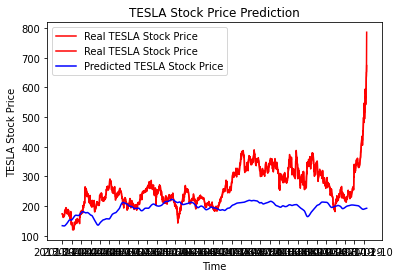

In [ ]:
#plot the predictions
plt.plot(dataset.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(dataset.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,1616,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()